## Single-layer-Neural-Nework for Binary classification

Classification 문제에서는 Sigmoid 함수를 적용해서 입력값 x 에 대해 결과값이 0 또는 1이 나오고, 미분이 가능하도록 해야 함


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.02642035,  0.74221314, -0.15721585, -0.38152803,  0.31598023,
       -0.78898268,  0.59511458, -0.20672974,  0.96286068,  0.63930876])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([-0.81149628, -0.40513265, -0.66751401, -0.93315135, -0.74225612,
        0.21289308,  0.72146399,  0.82741157, -0.60322512,  0.38916646])

In [4]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = y > 0.0

print(y.shape)
y[0:10]

(100,)


array([False,  True, False, False, False, False,  True,  True,  True,  True], dtype=bool)

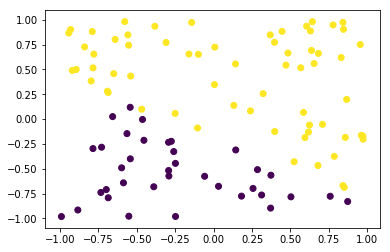

In [5]:
plt.scatter(x1, x2, c=y)

### Define Sigmoid

[Sigmoid 설명](http://pythonkim.tistory.com/22)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

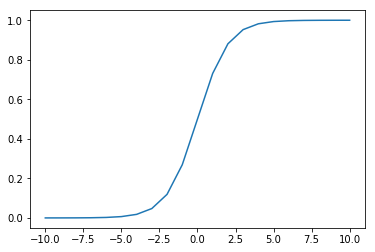

In [6]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [7]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, error))
    
    if error < 0.03:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} error = {1:.6f}".format(epoch, error))

 0 error = 0.320000
10 error = 0.050000
----------------------------------------
w1 = 1.405795, w2 = 2.222563 b = 0.607866
18 error = 0.020000


In [8]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = y_predict > 0.5

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})

result

,x1,x2,y(actual),y(predict)
0,-0.026420,-0.811496,False,False
1,0.742213,-0.405133,True,True
2,-0.157216,-0.667514,False,False
3,-0.381528,-0.933151,False,False
4,0.315980,-0.742256,False,False
5,-0.788983,0.212893,False,False
6,0.595115,0.721464,True,True
7,-0.206730,0.827412,True,True
8,0.962861,-0.603225,True,True
9,0.639309,0.389166,True,True


### Loss function 의 미분

Loss function : **W 값이 정답에서 멀어질 경우 오차가 급격히 커지도록**

$z(x) = wx + b$  

$h(x) = Sigmoid(z(x))$  

$Sigmoid(x) = \frac{1}{1+e^{-x}}$  

**새로운 Loss function**  
$L(x) = \frac{1}{m} \sum_{i=0}^\infty (y^ilog(h(x)^i)-(1-y^i)log(1-h(x)^i))$

Loss function 을 미분 :
- Loss function을 일단 간소화  
    $ylog(h(x))-(1-y)log(1-h(x))$


- Loss function을 미분  
    $\frac{dL(x)}{dW} = -y\frac{\partial}{\partial w}log(h(x))-(1-y)\frac{\partial}{\partial w}log(1-h(x))$  
    $= -y\frac{1}{h(x)}\frac{\partial}{\partial w}h(x)+(1-y)\frac{1}{1-h(x)}\frac{\partial}{\partial w}h(x)$  
    $= (-y\frac{1}{h(x)}+(1-y)\frac{1}{1-h(x)})\frac{\partial}{\partial w}h(x)$  
    $= (-y\frac{1}{h(x)}+(1-y)\frac{1}{1-h(x)})h(x)(1-h(x))\frac{\partial}{\partial w}z(x)$  
    $= (-y(1-h(x))+(1-y)h(x))\frac{\partial}{\partial w}z(x)$  
    $= -y + yh(x) + h(x) - yh(x)\frac{\partial}{\partial w}z(x)$  
    $= (h(x) - y)\frac{\partial}{\partial w}z(x)$  
    $= (h(x) - y)x$  
    $= \frac{1}{m} \sum_{i=0}^\infty (h(x)^i-y^i)x^i$  


- 미분 공식 참조

    1.로그함수    
    $f(x) = log(x), f'(x) = \frac{1}{x}$      
    $f(x) = log(h(x)), f'(x) = \frac{1}{h(x)}h'(x)$
    
    2.체인룰 (복합함수)  
    $f(x) = \frac{g(x)}{h(x)}, f'(x) = \frac{g'(x)h(x)-g(x)h'(x)}{(h(x))^2}$  
    $f(x) = \frac{1}{h(x)}, f'(x) = \frac{-h'(x)}{(h(x))^2}$
